# K means Clustering

***K-means clustering is a method of vector quantization used for partitioning n observations into k clusters. Each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. The goal is to minimize the sum of squared distances between the observations and the cluster centroids.***

## Working:-

**1. Initialization**: Choose k initial centroids randomly from the dataset.
2. **Assignment**: Assign each data point to the nearest centroid, forming k clusters.
3. **Update**: Calculate the new centroids by taking the mean of all data points in each cluster.
4. **Repeat**: Repeat the assignment and update steps until the centroids no longer change significantly or a maximum number of iterations is reached.***

# Gradient Descent

***Gradient descent is an optimization algorithm used to minimize the cost function in machine learning models. It iteratively adjusts the model's parameters in the direction of the steepest decrease in the cost function, based on the gradient (partial derivatives) of the cost function with respect to the parameters. The process continues until convergence is achieved, ideally finding the global minimum of the cost function.***

## Working

 1. Initialize Parameters: Start with initial guesses for the model parameters (weights and biases).

2. **Calculate Gradient**: Compute the gradient of the cost function with respect to each parameter. This involves calculating the partial derivatives of the cost function.

3. **Update Parameters**: Adjust the parameters in the opposite direction of the gradient by a small step size, known as the learning rate. This step is mathematically represented as:
   \[
   \theta := \theta - \alpha \nabla J(\theta)
   \]
   where \(\theta\) represents the parameters, \(\alpha\) is the learning rate, and \(\nabla J(\theta)\) is the gradient of the cost function.

4. **Repeat**: Iterate the process of calculating the gradient and updating the parameters until the cost function converges to a minimum, or until a pre-specified number of iterations is reached.***

# Gradient Descent in K means Algorithm

## 1.Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## 2.Define function

In [3]:
def initialize_centroids(X, k):
    """Randomly initialize k centroids from the dataset X"""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

## 3.Assign Clusters

In [4]:
def assign_clusters(X, centroids):
    """Assign each data point to the nearest centroid"""
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

## 4.Update Centroids

In [5]:
def update_centroids(X, labels, k):
    """Update centroid positions as the mean of assigned points"""
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

## 5.K means function

In [6]:
def k_means(X, k, max_iters=100, tol=1e-4):
    """Perform k-means clustering"""
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)

        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return centroids, labels

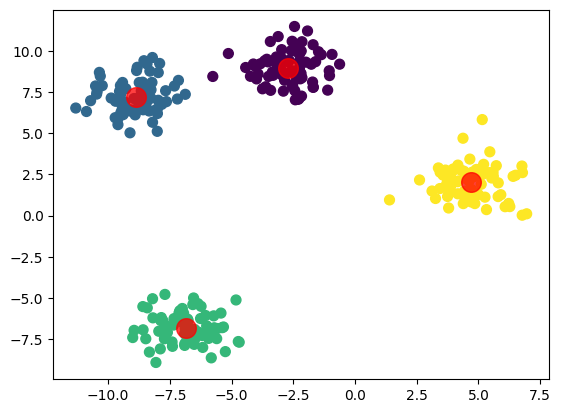

In [7]:
if __name__ == "__main__":
    # Generate synthetic data
    X, y = make_blobs(n_samples=300, centers=4, random_state=42)

    # Run k-means clustering
    k = 4
    centroids, labels = k_means(X, k)

    # Plot the results
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
    plt.show()